# Analyse temperature distributions arising from infilled data


In [1]:
import numpy as np
import pandas as pd
import pyam
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [3]:
folder = "../../iiasa-climate-assessement/output/fixed_output/"
all_data = pyam.IamDataFrame(folder + "allvar_sr15_mscen_alloutput.xlsx")
infilled_qrw = pyam.IamDataFrame(folder + "allvar_co2_only_sr15_mscen_alloutput.xlsx")
infilled_eqw = pyam.IamDataFrame(folder + "allvar_co2_only_sr15_mscen_EQW_alloutput.xlsx")
#infilled_ch4_qrw = pyam.IamDataFrame(folder + "allvar_co2ch4_only_sr15_mscen_alloutput.xlsx")
#infilled_ch4_eqw = pyam.IamDataFrame(folder + "allvar_co2ch4_only_sr15_mscen_EQW_alloutput.xlsx")

pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/fixed_output/allvar_sr15_mscen_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 47 scenarios (for total of 47)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/fixed_output/allvar_co2_only_sr15_mscen_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 47 scenarios (for total of 47)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/fixed_output/allvar_co2_only_sr15_mscen_EQW_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 47 scenarios (for total of 47)


In [28]:
all_data.data["infill"] = "Original"
infilled_qrw.data["infill"] = "CO2 QRW"
infilled_eqw.data["infill"] = "CO2 EQW"
# infilled_ch4_qrw["infill"] = "CO2 and CH4 QRW"
#infilled_ch4_eqw["infill"]  = "CO2 and CH4 EQW"
temp_comp = "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.3.0|50.0th Percentile"
decades = range(2030, 2101, 10)
all_temp_infills = pd.concat(
    [
        infilled_qrw.filter(variable=temp_comp, year=decades).data,
        all_data.filter(variable=temp_comp, year=decades).data,
        infilled_eqw.filter(variable=temp_comp, year=decades).data,
        #infilled_ch4_qrw.filter(variable=temp_comp, year=decades).data,
        #infilled_ch4_eqw.filter(variable=temp_comp, year=decades).data,
    ]
)

In [29]:
all_temp_infills["year"].unique()

array([2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100], dtype=int64)

In [80]:
all_temp_infills["model"].unique()

array(['AIM/CGE 2.1', 'IMAGE 3.0.1', 'MESSAGEix-GLOBIOM 1.0',
       'REMIND 1.7', 'REMIND-MAgPIE 1.7-3.0'], dtype=object)

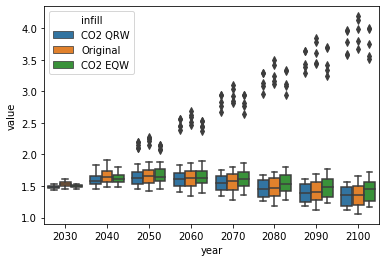

In [32]:
sns.boxplot(data=all_temp_infills, x="year", y="value", hue="infill")

In [33]:
temp_df = all_temp_infills.pivot(
    index=["model", "scenario", "year", "region", "unit", "variable"], columns="infill", values="value"
)

In [34]:
temp_df.describe()

infill,CO2 EQW,CO2 QRW,Original
count,376.000000,376.000000,376.000000
mean,1.656519,1.615629,1.644085
std,0.443802,0.456888,0.491407
min,1.172423,1.123390,1.057164
25%,1.475939,1.446948,1.448044
50%,1.561736,1.518748,1.550038
75%,1.675862,1.628887,1.668858
max,4.000446,3.977488,4.193336


In [35]:
for ind in range(len(temp_df.columns)):
    print(
        "for {}, correlation is {}".format(
        temp_df.columns[ind], str(np.polyfit(temp_df["Original"], temp_df[temp_df.columns[ind]], 1))
        )
    )

for CO2 EQW, correlation is [0.89511998 0.18486624]
for CO2 QRW, correlation is [0.92408348 0.09635699]
for Original, correlation is [ 1.00000000e+00 -1.83217219e-16]


In [37]:
np.polyfit(temp_df["Original"], temp_df["CO2 QRW"], 1)

array([0.92408348, 0.09635699])

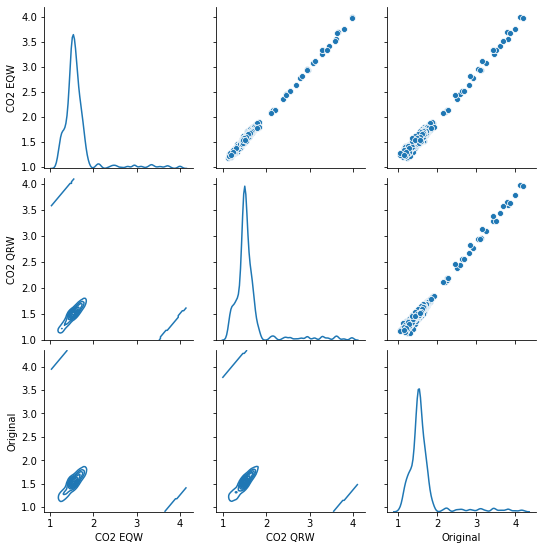

In [38]:
g = sns.PairGrid(temp_df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.kdeplot)

In [39]:
dif = {}
for col_ind in range(len(temp_df.columns)):
    for col_i2 in range(col_ind + 1, len(temp_df.columns)):
        dif[
            temp_df.columns[col_ind] + " - " + temp_df.columns[col_i2]
        ] = temp_df[temp_df.columns[col_ind]] - temp_df[temp_df.columns[col_i2]]

In [40]:
dif_df = pd.DataFrame(data=dif)
dif_df

CO2 EQW - CO2 QRW  \
model                 scenario                          year region unit variable                                                                
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy 2030 World  K    AR6 climate diagnostics|Surface Temperature (GS...           0.027053   
                                                        2040 World  K    AR6 climate diagnostics|Surface Temperature (GS...           0.064693   
                                                        2050 World  K    AR6 climate diagnostics|Surface Temperature (GS...           0.027718   
                                                        2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...           0.027892   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...           0.046896   
...                                                                                                                                        ...   
REMIND-MAgPIE 1.7-3.0 SMP_REF_Sust                      2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...          -0.016057   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...          -0.015940   
                                                        2080 World  K    AR6 climate diagnostics|Surface Temperature (GS...          -0.010339   
                                                        2090 World  K    AR6 climate diagnostics|Surface Temperature (GS...          -0.046476   
                                                        2100 World  K    AR6 climate diagnostics|Surface Temperature (GS...          -0.070749   

                                                                                                                             CO2 EQW - Original  \
model                 scenario                          year region unit variable                                                                 
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy 2030 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.007186   
                                                        2040 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.074743   
                                                        2050 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.067616   
                                                        2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.091432   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.109581   
...                                                                                                                                         ...   
REMIND-MAgPIE 1.7-3.0 SMP_REF_Sust                      2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.029229   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.029642   
                                                        2080 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.038612   
                                                        2090 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.092488   
                                                        2100 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.170065   

                                                                                                                             CO2 QRW - Original  
model                 scenario                          year region unit variable                                                                
AIM/CGE 2.1           

In [41]:
dif_df.describe()

,CO2 EQW - CO2 QRW,CO2 EQW - Original,CO2 QRW - Original
count,376.000000,376.000000,376.000000
mean,0.040891,0.012435,-0.028456
std,0.037808,0.078310,0.062698
min,-0.070749,-0.238131,-0.226982
25%,0.013540,-0.037065,-0.055014
50%,0.039273,0.018426,-0.031640
75%,0.068535,0.059254,0.003269
max,0.155964,0.238232,0.184775


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214D23A9BC8>,
      dtype=object)

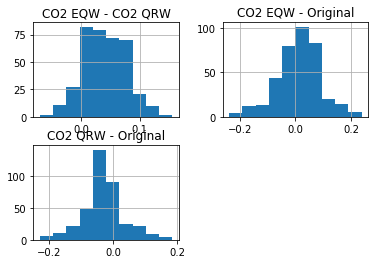

In [42]:
dif_df.hist()

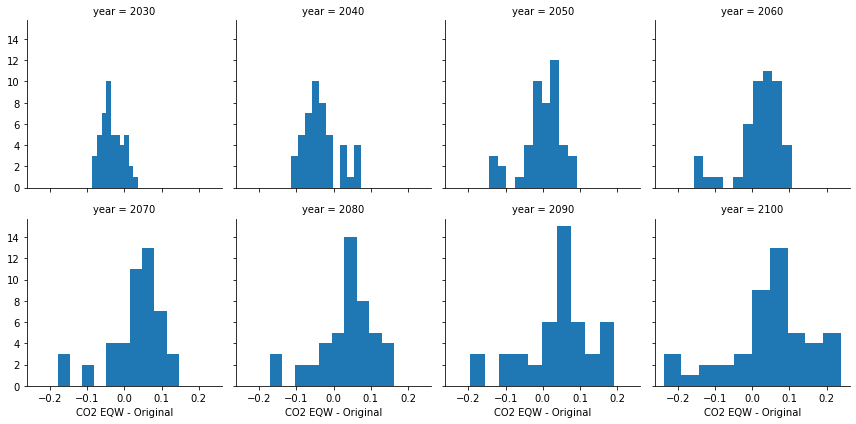

In [47]:
dif_df_full = dif_df[["CO2 EQW - Original", "CO2 QRW - Original"]].reset_index()
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 EQW - Original")

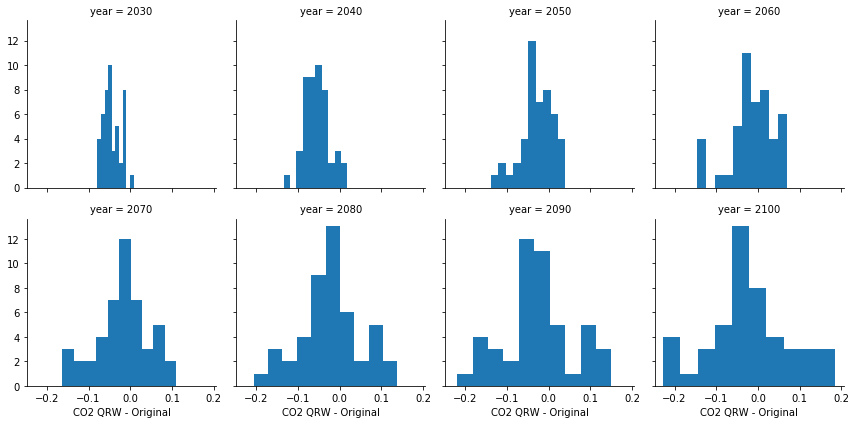

In [48]:
dif_df_full = dif_df[["CO2 EQW - Original", "CO2 QRW - Original"]].reset_index()
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 QRW - Original")

In [54]:
rms_EQW = np.mean(dif_df_full["CO2 EQW - Original"] ** 2) ** 0.5
rms_QRW = np.mean(dif_df_full["CO2 QRW - Original"] ** 2) ** 0.5
print("EQW RMS error is {}".format(rms_EQW))
print("QRW RMS error is {}".format(rms_QRW))

EQW RMS error is 0.07918800939021736
QRW RMS error is 0.06877762177485998


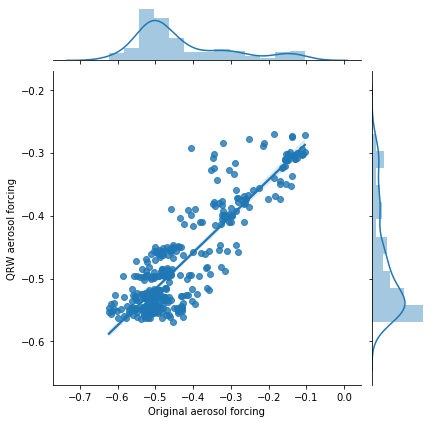

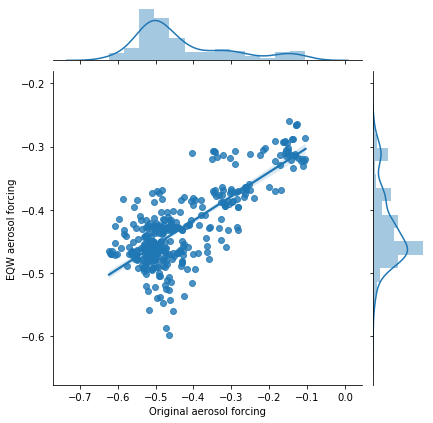

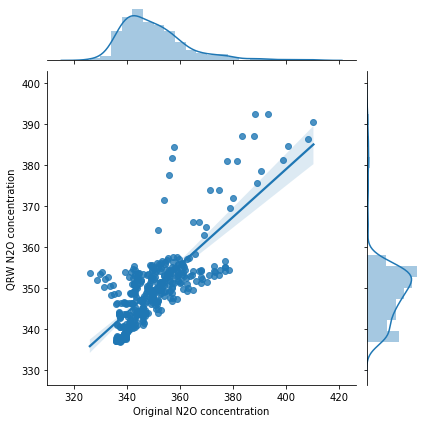

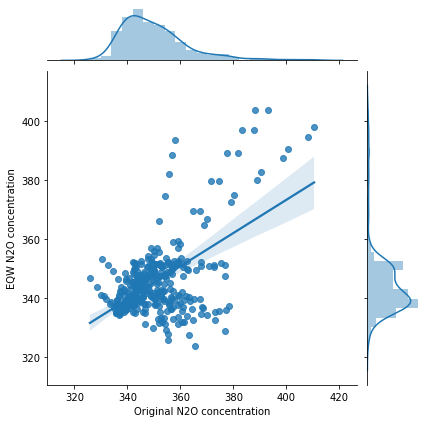

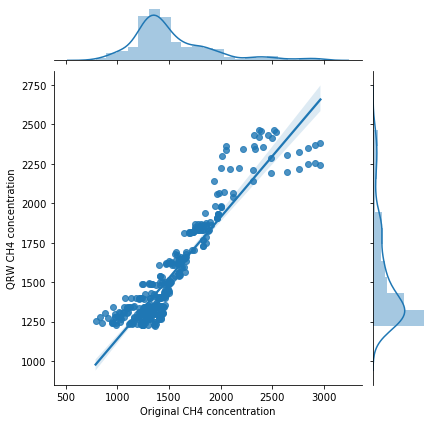

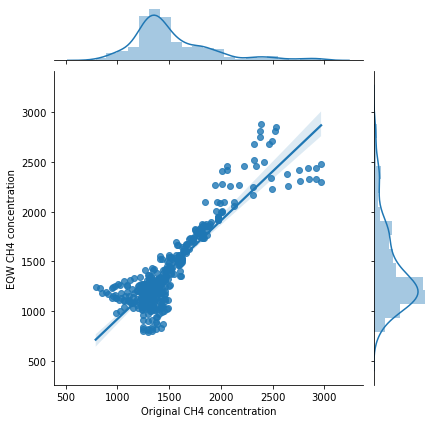

In [94]:
noninfill_cols = ['model', 'scenario', 'region', 'variable', 'unit', 'year']
to_plot_lst = [
    (" aerosol forcing", "AR6 climate diagnostics|Effective Radiative Forcing|Aerosols|Direct Effect|MAGICCv7.3.0|50.0th Percentile"),
    (" N2O concentration", "AR6 climate diagnostics|Atmospheric Concentrations|N2O|MAGICCv7.3.0|50.0th Percentile"),
    (" CH4 concentration", "AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.3.0|50.0th Percentile"),
]
for aerforce, aerosols_effect in to_plot_lst:
    
    plot_filter = {"variable": aerosols_effect, "year": decades}
    to_plot_data = all_data.filter(**plot_filter).data.merge(
        infill_qrw.filter(**plot_filter).data, on=noninfill_cols
    ).merge(
        infilled_eqw.filter(**plot_filter).data, on=noninfill_cols
    )
    sns.jointplot(x="value_x", y="value_y", data=to_plot_data, kind="reg").set_axis_labels("Original" + aerforce, "QRW" + aerforce)
    sns.jointplot(x="value_x", y="value", data=to_plot_data, kind="reg").set_axis_labels("Original" + aerforce, "EQW" + aerforce)